# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 35s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

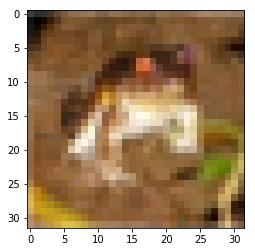

In [ ]:
# FROG
plt.imshow(x_train[0])

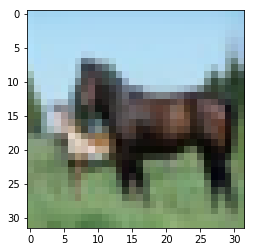

In [ ]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train/225

In [ ]:
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5167 - accuracy: 0.4567 - val_loss: 1.4301 - val_accuracy: 0.5061
Epoch 2/15
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1531 - accuracy: 0.5962 - val_loss: 1.1039 - val_accuracy: 0.6049
Epoch 3/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9958 - accuracy: 0.6533 - val_loss: 1.0260 - val_accuracy: 0.6436
Epoch 4/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8952 - accuracy: 0.6905 - val_loss: 1.0127 - val_accuracy: 0.6579
Epoch 5/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8162 - accuracy: 0.7210 - val_loss: 1.0905 - val_accuracy: 0.6363
Epoch 6/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7585 - accuracy: 0.7428 - val_loss: 1.0324 - val_accuracy: 0.6656
Epoch 7/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7126 - accuracy: 0.7579 - val_loss: 0.9880 -

In [ ]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.516735,0.45672,1.430096,0.5061
1,1.153064,0.59624,1.103872,0.6049
2,0.995785,0.65332,1.025982,0.6436
3,0.895227,0.69048,1.012746,0.6579
4,0.816212,0.72098,1.090461,0.6363


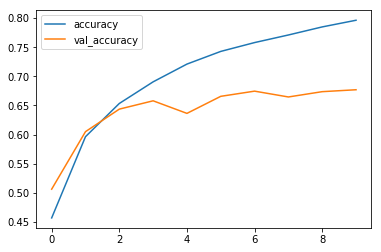

In [ ]:
losses[['accuracy','val_accuracy']].plot()

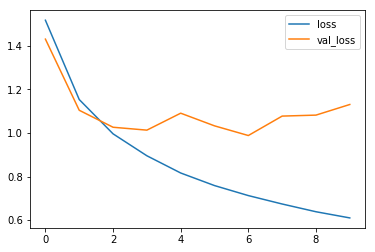

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1303350925445557, 0.6769000291824341]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1000
           1       0.81      0.78      0.79      1000
           2       0.44      0.74      0.56      1000
           3       0.56      0.42      0.48      1000
           4       0.60      0.69      0.64      1000
           5       0.61      0.56      0.59      1000
           6       0.75      0.78      0.77      1000
           7       0.79      0.70      0.74      1000
           8       0.86      0.68      0.76      1000
           9       0.82      0.72      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[687,  25, 139,  24,  36,   6,  11,   7,  41,  24],
       [ 26, 776,  41,  15,   5,  11,  18,   5,  23,  80],
       [ 35,   2, 745,  16,  86,  49,  39,  16,   9,   3],
       [  9,   8, 163, 417, 106, 156,  83,  38,   8,  12],
       [ 12,   2, 143,  31, 692,  21,  50,  40,   8,   1],
       [  8,   2, 134, 138,  72, 562,  31,  47,   1,   5],
       [  2,   1, 100,  44,  32,  27, 782,   8,   1,   3],
       [ 10,   2,  98,  16,  95,  57,   9, 703,   2,   8],
       [121,  57,  55,  20,  18,  12,   8,   6, 682,  21],
       [ 41,  80,  58,  18,  12,  13,  13,  21,  21, 723]], dtype=int64)

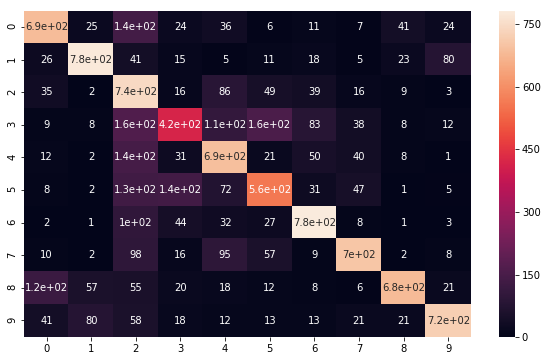

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [ ]:
my_image = x_test[16]

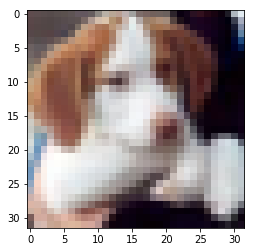

In [ ]:
plt.imshow(my_image)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html